$$\text{Расчёт в Python}$$

In [1]:
import matplotlib.pyplot as plt # библиотека графиков 
import numpy as np #библиотека численных вычислений
from pint import UnitRegistry #библиотека единиц измерения 
import matplotlib
matplotlib.rcParams['font.family'] = 'Times New Roman'  # Задайте нужный шрифт
matplotlib.rcParams['font.size'] = 12
u = UnitRegistry()
u.define("hAt = 100 * ampere") #определяем собственную единицу измерения

In [2]:
def ppprint(name, symbol, value):
    """
    Форматирует и выводит данные в табличном виде.

    :param name: Название параметра (например, "Диаметр").
    :param symbol: Обозначение параметра (например, "D_a").
    :param value: Значение параметра (например, "23mm").
    """
    # Устанавливаем ширину колонок
    col_widths = [40, 10, 10]  # Ширины колонок: Название, Обозначение, Значение

    # Формат строки
    row_format = f"{{:<{col_widths[0]}}} | {{:^{col_widths[1]}}} | {{:<{col_widths[2]}}}"

    
    # print("-" * (sum(col_widths) + 6))  # Разделитель (длина строк + разделители "|")

    # Печать значения
    print(row_format.format(name, symbol, str(value)))
D_a =1 * u.mm

In [3]:
class SinhronyGenereator:           #класс в котором все исходные даннные
    S_n = 60000 * u.VA              #полная мощность
    U_f = 120 * u.V                 # Напряжение фазы
    m_f = 3                         #количество фаз
    n_speed = 6000 / u.min          # частота вращения 
    f = 400 * u.Hz                  # частота напряжения
    etta = 0.92                     #КПД
    cosfi = 0.99                    #коэффицент мощности (активной)
    tetta = 20 * u.degree           #20 * u.degree # угол нагрузки
    k_as = 0.2                      # коэффицент рассеяния
    A_l = 33*10**3 * (u.A / (u.m))  #линейная токовая нагрузка
    B_delta = 0.573 * u.T           #Магнитная индукция в зазоре
    B_z = 1.8 * u.T                 #Магнитная индукция в зубце
    k_f = np.pi / (2 * np.sqrt(2))  #коэффициент формы
    k_a = np.sqrt(2)                # коэффициент амплитуды
    k_o = 0.9                       #коэффиицент обмотки
    lyambda = 0.4                   #отношение осевой длинны машины к диаметру якоря

k_yap = 1.5 #Коэффицент явнополюсности
k_LC = -1 # коэффициент типа нагрузки (ёмкостной)
k_DG = -1 # режим машины (двигательный)

In [4]:
SG = SinhronyGenereator  # создаём объект класса 
I_f = SG.S_n / (SG.m_f * SG.U_f) #Ток фазы
# print("Ток фазы =", I_f.to('A')) #вывод и перевод в другие единицы измерения
ppprint("Ток фазы", "I_f", I_f.to('A'))
fi =  k_LC * np.arccos(SG.cosfi) * u.radian #угол коэффициента мощности
ppprint("угол φ", "fi" ,fi.to('deg'))
p = SG.f.to('1/min') / SG.n_speed # количество пар полюсов
ppprint("Количество пар полюсов","p", p)
U_L = SG.U_f * SG.cosfi
ppprint("Активная составляющая напряжения", "U_L", U_L)
E_L = SG.U_f * np.sin(fi)
ppprint("Реактивная составляющая напряжения", "E_L", E_L)
E_r =  (SG.S_n * (1 - SG.etta) * SG.cosfi) / (SG.m_f * I_f)
U_r = E_r
ppprint("Активные потери", "U_r", U_r)
R_a = U_r / I_f
ppprint("Сопротивление обмотки", "R_a", R_a.to('ohm'))
ksi = fi + (SG.tetta * k_DG)
ppprint(f"Угол Ψ", "Ψ", ksi.to('degree'))
E_c = (U_L + U_r)*np.tan(ksi) - E_L   # Вычисление ЭДС для векторной диаграммы
ppprint(f"ЭДС синхронная", "E_c", E_c)
E_0 = np.sqrt((E_c + E_L)**2 + (U_L + E_r)**2)
ppprint(f"ЭДС наведённая ОВ", "E_0", E_0)
E_s = E_c * SG.k_as
E_a = E_c - E_s
ppprint("ЭДС рассеняния", "E_s", E_s)
ppprint(f"ЭДС реакции якоря","E_a", E_a)

Ток фазы                                 |    I_f     | 166.66666666666666 ampere
угол φ                                   |     fi     | -8.109614455994183 degree
Количество пар полюсов                   |     p      | 4.0 dimensionless
Активная составляющая напряжения         |    U_L     | 118.8 volt
Реактивная составляющая напряжения       |    E_L     | -16.92808317559907 volt
Активные потери                          |    U_r     | 9.503999999999994 volt
Сопротивление обмотки                    |    R_a     | 0.05702399999999997 ohm
Угол Ψ                                   |     Ψ      | -28.109614455994183 degree
ЭДС синхронная                           |    E_c     | -51.60754332671405 volt
ЭДС наведённая ОВ                        |    E_0     | 145.46150183489982 volt
ЭДС рассеняния                           |    E_s     | -10.321508665342812 volt
ЭДС реакции якоря                        |    E_a     | -41.28603466137124 volt


In [5]:
I_d = I_f * np.sin(ksi)             # Проекцтия тока фазы на ось d
ppprint(f"Продольная сост. тока", "I_d", I_d.to('A'))
I_q = I_f * np.cos(ksi)             # Проекцтия тока фазы на ось q
ppprint(f"Поперечная сост. тока","I_q",I_q.to('A'))
I_aktiv = I_f * np.cos(fi)          # Активная составляющая тока
ppprint(f"I_aktiv","I_aktiv", I_aktiv)
I_re = I_f * np.sin(fi)             # Реактивная составляющая тока
ppprint(f"I_re ", "I_re ", I_re)

Продольная сост. тока                    |    I_d     | -78.52664982118051 ampere
Поперечная сост. тока                    |    I_q     | 147.0079693269704 ampere
I_aktiv                                  |  I_aktiv   | 165.0 volt_ampere / volt
I_re                                     |   I_re     | -23.511226632776484 volt_ampere / volt


In [6]:
P_21 = SG.m_f * (E_0 * np.cos(fi + (SG.tetta*k_DG)) - U_r) * I_f * SG.etta # полезная мощность на валу
print(f"P_21 = {P_21}")
P_22  = SG.m_f * SG.U_f * (I_f * SG.etta) * np.cos(fi)   # полезная мощность на валу
print(f"P_22 = {P_22}")
P_1 = P_21 / SG.etta #полная мощность потребляемая из сети
ppprint(f"полная мощность потребляемая из сети", "P_1", P_1.to('W'))
P_pot = P_1 * (1 - SG.etta) # мощность потерь
ppprint(f"Мощность потерь", "P_пот" ,P_pot.to('W'))
# ниже вычисляем диаметр расточки якоря
D_a = np.cbrt(((P_1 + P_pot) / ((np.pi**2) * SG.k_f * SG.k_o * SG.B_delta * SG.A_l * \
                                SG.lyambda * SG.n_speed * np.cos(fi + (SG.tetta*k_DG)))).to_base_units())
ppprint(f"диаметр расточки якоря", "D_a", D_a.to('mm'))
L_s = SG.lyambda * D_a    # Осевая длинна машины
ppprint(f"Осевая длинна машины", "L_s", L_s.to('mm'))
w_a = ((SG.A_l * np.pi * D_a) / (SG.m_f * I_f * 2)).to_base_units() #число витков якорной обмотки
ppprint(f"Число витков ОЯ", "w_a", w_a)
#непосредственный расчёт мощности на валу
P_2 = SG.m_f * (SG.k_f * SG.B_delta * L_s * np.pi * D_a * SG.n_speed * \
                2 * w_a * SG.k_o * np.cos(fi + (SG.tetta*k_DG)) - U_r) \
                    * I_f * SG.etta
P_2 = P_2.to('W')
ppprint(f"Мощность на валу", "P_2", P_2.to('W'))
# Длинна полюсного деления
tay = ((np.pi * D_a) / (2 * p)).to('mm') 
ppprint(f"Длинна полюсного деления", "tay", tay)
F_a = ((SG.A_l * tay * SG.k_o) / (2 * SG.k_f)).to_base_units() # МДС реакции якоря
F_a = F_a.to('hAt')
ppprint(f"МДС реакции якоря", "F_a", F_a)
E_i = np.sqrt((E_s + E_L)**2 + (U_L + U_r)**2)
ppprint(f"ЭДС от результирующего поля", "E_i", E_i)

P_21 = 54648.0 volt_ampere
P_22 = 54648.0 volt_ampere
полная мощность потребляемая из сети     |    P_1     | 59400.0 watt
Мощность потерь                          |   P_пот    | 4751.999999999997 watt
диаметр расточки якоря                   |    D_a     | 213.60633476973342 millimeter
Осевая длинна машины                     |    L_s     | 85.44253390789338 millimeter
Число витков ОЯ                          |    w_a     | 22.145115038403606 dimensionless
Мощность на валу                         |    P_2     | 54648.00000000001 watt
Длинна полюсного деления                 |    tay     | 83.88301150910458 millimeter
МДС реакции якоря                        |    F_a     | 11.214904720641114 hAt
ЭДС от результирующего поля              |    E_i     | 131.16576028635646 volt


In [7]:
positiv_ksi = -ksi # для некторых вычиланий берём положительный пси
F_ad = F_a * np.sin(ksi) # Реакция якоря продольной оси
F_ad = F_ad.to('hAt') 
ppprint(f"Реакция якоря продольной оси", "F_ad", F_ad) 
F_aq = F_a * np.cos(ksi) # Реакция якоря поперечной оси
F_aq = F_aq.to('hAt')
ppprint(f"Реакция якоря поперечной оси", "F_aq", F_aq) 
gamma = -90 * u.deg - ksi #вычисляем угол гамма который являеться смежным для пси
ppprint(f"угол гамма", "gamma",  gamma)
gammapi = 90 * u.deg - np.abs(ksi) # угол гамма в 90
ppprint(f"угол гамма", "gammapi", gammapi)
E_ad = E_a * np.cos(gamma)
ppprint(f"E_ad", "E_ad", E_ad.to('V'))
E_aq = E_a * np.sin(gamma)
ppprint(f"E_aq", "E_aq", E_aq.to('V'))
fi_betta = np.arctan((E_s + E_L) / (U_r + U_L))
ppprint(f"угол  φ_бетта", "fi_betta",fi_betta.to('degree'))
betta = fi_betta - fi
ppprint(f"угол бетта", "betta",betta.to('degree'))
E_q = E_c * np.sin(gamma)
ppprint(f"E_q" , "E_q", E_q.to('V'))
E_d = E_c * np.cos(gamma)
ppprint(f"E_d", "E_d", E_d.to('V'))
# Расчёт индуктивных сопротивлений
X_L =  -E_L / I_f
X_s = -E_s / I_f
X_c = -(E_c / I_f)
X_ad = E_ad / I_d
X_aq = E_aq / I_q
X_d = X_ad + X_s
X_q = X_aq + X_s
X_dyap = X_d * k_yap
X_adyap = X_ad * k_yap

F_i = F_aq / (np.sin((SG.tetta*k_DG) - betta))
F_i = F_i
ppprint(f"МДС результирущего поля", "F_i", F_i)
F_xx = np.sqrt(F_i**2 - F_aq **2)
ppprint(f"F_xx", "F_xx", F_xx)
F_0 = F_xx - F_ad
ppprint(f"МДС намагничивания", "F_0", F_0)

Реакция якоря продольной оси             |    F_ad    | -5.284013374654134 hAt
Реакция якоря поперечной оси             |    F_aq    | 9.892082215061425 hAt
угол гамма                               |   gamma    | -61.89038554400582 degree
угол гамма                               |  gammapi   | 61.89038554400582 degree
E_ad                                     |    E_ad    | -19.452323918151727 volt
E_aq                                     |    E_aq    | 36.41625670278659 volt
угол  φ_бетта                            |  fi_betta  | -11.990486636834817 degree
угол бетта                               |   betta    | -3.8808721808406337 degree
E_q                                      |    E_q     | 45.52032087848324 volt
E_d                                      |    E_d     | -24.31540489768966 volt
МДС результирущего поля                  |    F_i     | -35.62975994878659 hAt
F_xx                                     |    F_xx    | 34.22903012734399 hAt
МДС намагничивания                    

In [8]:
print(f"X_L = {X_L.to('ohm')}") #Знак минус указан чтобы вывести абсолютные значения
print(f"X_s = {X_s.to('ohm')}")
print(f"X_c = {X_c.to('ohm')}")
print(f"X_ad = {X_ad.to('ohm')}")
print(f"X_aq = {X_aq.to('ohm')}")
print(f"X_d = {X_d.to('ohm')}")
print(f"X_q = {X_q.to('ohm')}")
print(f"X_adyap = {X_adyap.to('ohm')}")
print(f"X_dyap = {X_dyap.to('ohm')}")


X_L = 0.10156849905359443 ohm
X_s = 0.06192905199205687 ohm
X_c = 0.3096452599602843 ohm
X_ad = 0.2477162079682275 ohm
X_aq = 0.24771620796822738 ohm
X_d = 0.30964525996028436 ohm
X_q = 0.30964525996028425 ohm
X_adyap = 0.37157431195234125 ohm
X_dyap = 0.46446788994042654 ohm


In [9]:
#продолжение расчётов
#Найдём ток возбуждения
I_d25 = 25 * u.A
k_ampl = np.sqrt(2)
k_t = np.sqrt(3/2)
I_v = I_d25 * k_ampl * k_t #ток возбуждения
w_ov = F_0 / I_v #число витков для обмотки возбуждения
print(f"ток возбуждения I_v = {I_v}")
print(f"число витков ОВ w_ov = {w_ov.to_base_units()}")

#если используем постоянные магниты то
mu = 1.07
mu_0 = 4 * np.pi * 10**-7 * u.henry / u.meter
H_c = 834000 * u.A/u.m
h_m = (F_0 * mu * mu_0) / (mu * mu_0 * H_c - SG.B_delta)
print(f"Необхoдимая толщина постоянного магнита h_m = {h_m.to('mm')}")

ток возбуждения I_v = 43.30127018922193 ampere
число витков ОВ w_ov = 91.25146520952005 dimensionless
Необхoдимая толщина постоянного магнита h_m = 9.68809604413638 millimeter


In [10]:
E_dyap = X_dyap * I_d
print(f"E_dyap = {E_dyap}")
E_yap = E_dyap - E_d #так как E_d Отрицательный а нам нужно сложить то минус
print(f"E_yap = {E_yap}")
E_0yap = E_0 - E_yap
print(f"E_0yap = {E_0yap}")
E_ayap = np.sqrt(E_aq**2 + (E_dyap + E_s * np.sin(ksi))**2)   #E_s отрицательный поэтому плюс
print(f"E_ayap = {E_ayap}")
E_cyap = np.sqrt(E_q**2 + E_dyap**2)
print(f"E_cyap = {E_cyap}")
alpha1 = np.arctan((E_aq)/(E_dyap + E_s* np.sin(ksi)))
alpha2 = np.arctan((E_q)/(E_dyap))
print(f" alpha1 = {alpha1.to('deg')}", "\n", f"alpha2 = {alpha2.to('deg')}" )
U_etta = np.sqrt((U_L + E_r)**2 + E_L**2)
print(f"U_etta = {U_etta}")
fi_R = np.arctan(E_L / (U_L + E_r))
print(f"fi_R = {fi_R.to('deg')}")
delta_fi_R = fi - fi_R
print(f"delta_fi_R = {delta_fi_R.to('deg')}")

E_dyap = -36.47310734653448 volt
E_yap = -12.157702448844823 volt
E_0yap = 157.61920428374464 volt
E_ayap = 48.221753588660235 volt
E_cyap = 58.32998519108251 volt
 alpha1 = -49.04137727036164 degree 
 alpha2 = -51.296585944667186 degree
U_etta = 129.41590480308054 volt
fi_R = -7.516039302082348 degree
delta_fi_R = -0.5935751539118352 degree


In [11]:
gatito_width = 0.002
u.setup_matplotlib(True)

def component(value, angle):
    ValueX = value * np.cos(angle)
    ValueY = value * np.sin(angle)
    return ValueX, ValueY

def vector1(x , y):
    plt.quiver(0, 0, x, y,angles='xy', scale_units='xy', scale=1, width = gatito_width)

def vector_f(x0 , y0, x1, y1, width = gatito_width, color = "black"):
    plt.quiver(x0, y0, x1, y1 ,angles='xy', scale_units='xy', scale=1, width = width, color=color)

    # Добавляем функцию для автоматического подписания векторов
def annotate_vector(ax, x, y, label, offset=(2,2), fontsize=9, color="black"):
    """
    Подписывает вектор на диаграмме.

    :param ax: объект Axes
    :param x: координата X конца вектора
    :param y: координата Y конца вектора
    :param label: текст подписи
    :param offset: смещение подписи в пикселях (по умолчанию (2, 2))
    :param fontsize: размер шрифта
    :param color: цвет текста
    """
    
    ax.annotate(
        label,
        (x.magnitude, y.magnitude),  # Координаты конца вектора
        textcoords="offset points",
        xytext=offset,
        ha="center",
        fontsize=fontsize,
        color=color
    )

def vector_d(*args, x0 = 0, y0 = 0, color = "black", width = gatito_width, \
             headlength = 5, headaxislength = 4.5, headwidth = 3):

    if len(args) == 1 and isinstance(args[0], (tuple, list)):
        x, y = args[0]
    elif len(args) == 2:
        # Если переданы x и y отдельно
        x, y = args
    else:
        raise ValueError("Передайте либо кортеж/список (x, y), либо два значения x и y.")
    
    plt.quiver(x0, y0, x, y, color = color,  width=width,\
               angles='xy' ,scale_units='xy', scale=1, \
                headlength = headlength, headaxislength = headaxislength, headwidth = headwidth)

In [12]:
#проекции
U_Lxy = U_Lx, U_Ly = SG.U_f * np.cos(fi), 0 * u.V
E_Lxy = E_Lx, E_Ly = 0* u.V, SG.U_f * np.sin(fi)
E_cxy = E_cx, E_cy =  0* u.V, E_c
E_axy = E_ax, E_ay =  0* u.V, E_a
U_rxy = U_rx, U_ry =  U_r, 0* u.V


I_fxy = I_fx, I_fy = component(I_f, 0)
U_fxy = U_fx, U_fy = component(SG.U_f, fi)
E_0xy = E_0x, E_0y = component(E_0, ksi)
E_ixy = E_ix, E_iy = component(E_i, fi_betta)
F_axy = F_ax,F_ay = component(-F_a, 0)
F_aqxy = F_aqx, F_aqy = component(F_aq, np.pi + ksi)
F_adxy = F_adx,F_ady = component(F_ad, gammapi)
E_adxy = E_adx, E_ady = component(E_ad, gamma)
F_ixy = F_ix, F_iy = component(-F_i, fi_betta.to('radian') + (np.pi / 2))
F_xxxy = F_xxx, F_xxy = component(F_xx, ksi.to('radian') + (np.pi/2) )
F_0xy = F_0x, F_0y = component(F_0, ksi.to('radian') + (np.pi/2) )
I_dxy = I_dx,I_dy = component(-I_d, -gamma)
I_qxy = I_qx, I_qy = component(I_q, ksi)
E_sxy = E_sx, E_sy = component(E_s, -(np.pi/2))
E_adxy = E_adx, E_ady = component(E_ad, (-np.pi/2)-gamma)
E_aqxy = E_aqx, E_aqy = component(E_aq, -gamma)
E_dxy = E_dx, E_dy = component(E_d, (-np.pi/2)-gamma)
E_qxy = E_qx,E_qy = component(E_q, -gamma)
E_0yapxy = E_0yapx,E_0yapy = component(E_0yap, ksi)
E_ayapxy = E_ayapx,E_ayapy = component(E_ayap, np.pi/2 + (gammapi + alpha1))
E_cyapxy = E_cyapx, E_cyapy = component(E_cyap, np.pi/2 + (gammapi + alpha2))
U_ettaxy = U_ettax,U_ettay = component(U_etta, fi_R)
E_dyapxy = E_dyapx, E_dyapy = component(E_dyap, (-np.pi/2)-gamma)
E_yapxy = E_yapx, E_yapy = component(-E_yap, ksi)

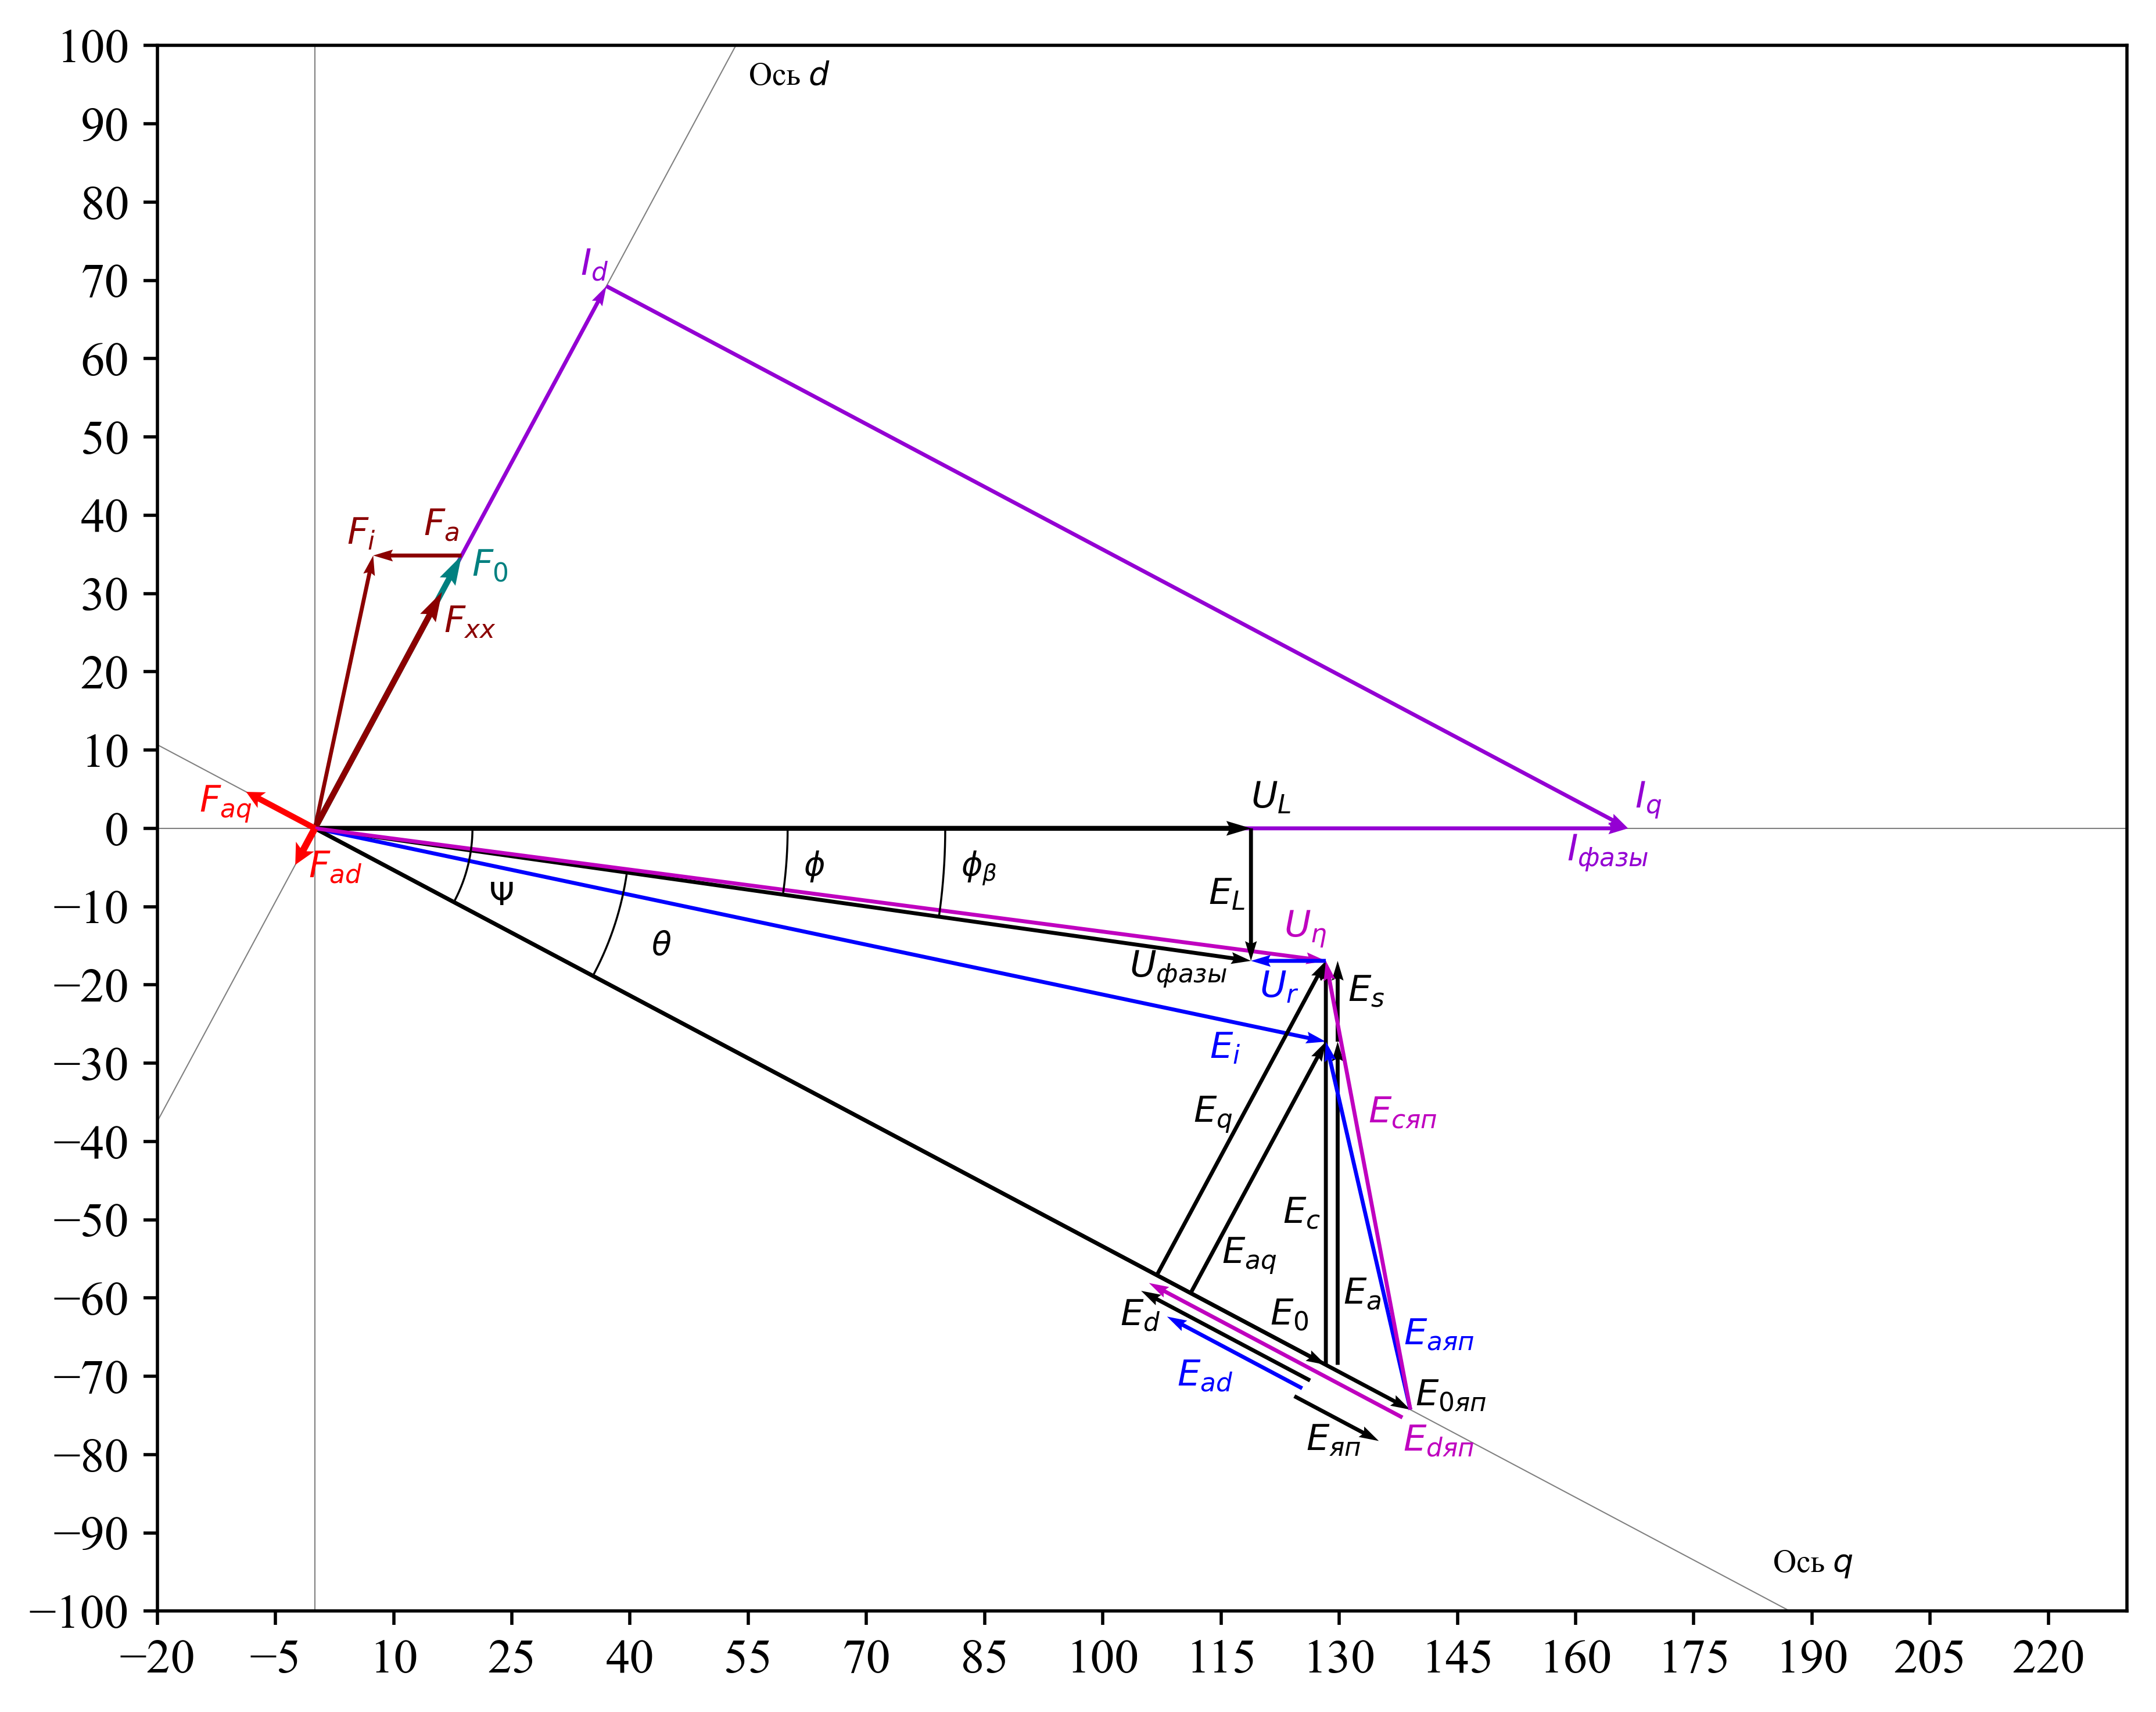

In [33]:
fig, ax = plt.subplots(figsize=(7*1.25, 7), dpi = 500)
ax.axhline(0, color='grey', linewidth=0.3, linestyle='-', zorder=1)
ax.axvline(0, color='grey', linewidth=0.3, linestyle='-', zorder=1)

# Рисуем оси под углом
angle = ksi  # Угол в градусах

# Координаты для осей под углом
length = 500  # Длина осей
x1, y1 = length * np.cos(angle), length * np.sin(angle)
x2, y2 = -x1, -y1
ax.plot([0, x1], [0, y1], color='grey', linestyle='-', linewidth=0.3, zorder=1)
ax.plot([0, x2], [0, y2], color='grey', linestyle='-', linewidth=0.3, zorder=1)

angle = ksi - (np.pi/2)  # Угол в градусах
x1, y1 = length * np.cos(angle), length * np.sin(angle)
x2, y2 = -x1, -y1
ax.plot([0, x1], [0, y1], color='grey', linestyle='-', linewidth=0.3, zorder=1)
ax.plot([0, x2], [0, y2], color='grey', linestyle='-', linewidth=0.3, zorder=1)

vector_d(I_fxy, color = "darkviolet", width = 0.002)
vector_d(U_fxy)
vector_d(U_Lxy, width = 0.0025)

vector_d(E_0xy)

vector_d(E_ixy, color = "blue")
annotate_vector(ax, E_ix, E_iy, r"$E_{i}$",offset=(-25 ,-4), color = "blue")

vector_d(E_ax, -E_ay , x0 = E_0x + 1.5*u.V, y0 = E_0y) #Смещение
annotate_vector(ax, E_ix, E_iy, r"$E_{a}$",offset=(9 ,-65))

vector_d(-E_cx, -E_cy ,x0 = E_0xy[0], y0 = E_0xy[1])
annotate_vector(ax, E_ix, E_iy, r"$E_{c}$",offset=(-6 ,-45))



vector_d(F_ixy, color = "darkred")
annotate_vector(ax, F_ix, F_iy, r"$F_{i}$",offset=(-3 ,3),\
                color = "darkred" )


vector_d(I_dxy, color = "darkviolet")
annotate_vector(ax, I_dx, I_dy, r"$I_{d}$",offset=(-3 ,3)\
                 ,color = "darkviolet")

vector_d(I_qxy,  x0 = I_dx.magnitude, y0= I_dy.magnitude\
         ,color = "darkviolet")
annotate_vector(ax, I_fx, I_fy, r"$I_{q}$",\
                 color = "darkviolet", offset=(5, 5))


vector_d(F_0xy, color = "teal", width = 0.003)
annotate_vector(ax, F_0x, F_0y, r"$F_{0}$",offset=(7 ,-5)\
                , color = "teal")

vector_d(F_xxxy, width = 0.003, color = "darkred")
annotate_vector(ax, F_xxx, F_xxy, r"$F_{xx}$",offset=(7 ,-10)\
                 ,color = "darkred")

vector_d(F_axy[0].magnitude, F_axy[1].magnitude,\
          x0 = F_0x.magnitude, y0 =F_0y.magnitude, \
           color = "darkred" )
annotate_vector(ax, F_0x, F_0y, r"$F_{a}$",offset=(-5 ,5)\
                , color = "darkred")


vector_d(E_sx, E_sy, x0 = (E_ix + 1.5 * u.V), y0 = E_iy)
annotate_vector(ax, U_ettax, U_ettay, r"$E_{s}$",offset=(10 , -10))

vector_d(E_adxy, x0 = E_0x - 3 *u.V, y0 = E_0y - 3 *u.V, color = "blue")
annotate_vector(ax, E_0x, E_0y, r"$E_{ad}$",offset=(-30 , -5),color = "blue")

vector_d(E_aqxy, x0 = E_0x + E_adx, y0 = E_0y + E_ady)
annotate_vector(ax, E_ix, E_iy, r"$E_{aq}$",offset=(-19, -55))

vector_d(E_dx, E_dy, x0 = E_0x- 2 *u.V, y0 = E_0y- 2 *u.V)
annotate_vector(ax, E_0x, E_0y, r"$E_{d}$",offset=(-46 , 10))

vector_d(E_qx, E_qy, x0 = E_0x + E_dx, y0= E_0y + E_dy)
annotate_vector(ax, U_ettax, U_ettay, r"$E_{q}$",offset=(-28, -40))

vector_d(E_0yapxy)
annotate_vector(ax, E_0yapx, E_0yapy, r"$E_{0яп}$",offset=(10, 1))

vector_d(E_ayapx, E_ayapy, x0 = E_0yapx, y0= E_0yapy, color = "blue")
annotate_vector(ax, E_ix, E_iy, r"$E_{aяп}$",offset=(28, -75), color = "blue")

vector_d(E_cyapx, E_cyapy,  x0 = E_0yapx, y0 = E_0yapy, color = "m")
annotate_vector(ax, E_ix, E_iy, r"$E_{cяп}$",offset=(19, -20), color = "m")


vector_d(E_dyapxy, x0 =E_0yapx- 1 *u.V, y0 = E_0yapy- 1 *u.V , color = "m")
annotate_vector(ax, E_0yapx, E_0yapy, r"$E_{dяп}$",offset=(7, -10), color = "m")


vector_d(E_yapxy, x0 =E_0x- 4 *u.V, y0 = E_0y- 4 *u.V )
annotate_vector(ax, E_0yapx, E_0yapy, r"$E_{яп}$",offset=(-19, -10))


vector_d(U_ettaxy, color = "m")
annotate_vector(ax, U_ettax, U_ettay, r"$U_{\eta}$",offset=(-5, 6),color = "m")

vector_d(-U_rx, U_ry, x0 = E_0xy[0], y0 = E_0xy[1]-E_cy, color = "blue") #vector Ur or Er
annotate_vector(ax, U_fx, U_fy, r"$U_{r}$",offset=(7 ,-9), color = "blue")

plt.quiver(0,0, F_aqx, F_aqy, angles='xy', scale_units='xy',\
            scale=1, width = 1.5*gatito_width, color = 'red',\
           headlength = 3, headaxislength = 3-0.5)
annotate_vector(ax, F_aqx, F_aqy, r"$F_{aq}$",offset=(-5, -5),\
                color = 'red')


plt.quiver(0,0, F_adx, F_ady, angles='xy', scale_units='xy', \
           scale=1, width = 0.0035, color = 'red', \
           headlength = 3, headaxislength = 3-0.5)
annotate_vector(ax, F_adx, F_ady, r"$F_{ad}$",offset=(10, -3),\
                color = 'red')


# vector_f( E_0yapx, E_0yapy, E_ayapx, E_ayapy)
# vector_f( E_0yapx, E_0yapy, E_cyapx, E_cyapy)
# vector1(U_ettax,U_ettay)

annotate_vector(ax, I_fx, I_fy, r"$I_{фазы}$", color = "darkviolet", offset=(-5, -8))
annotate_vector(ax, U_fx, U_fy, r"$U_{фазы}$", offset=(-18 ,-4))
annotate_vector(ax, U_Lx, U_Ly, r"$U_{L}$", offset=(5 ,5))
vector_d(E_Lxy, x0 = U_Lxy[0], y0 =U_Lxy[1])
annotate_vector(ax, U_fx, U_fy, r"$E_{L}$",offset=(-6 ,14))
annotate_vector(ax, E_0x, E_0y, r"$E_{0}$",offset=(-9 ,10))





angle_ksi = np.linspace(0, ksi.magnitude, 200)  # Угол 45 градусов
arc_x = 20 * np.cos(angle_ksi)  # Радиус дуги 0.2
arc_y = 20 * np.sin(angle_ksi)
plt.plot(arc_x, arc_y, color='black', lw = 0.5)
plt.text(25 * np.cos(ksi.magnitude) + 0,\
         25 * np.sin(ksi.magnitude) + 2, r'$\Psi$',\
             fontsize = 8)

angle_fi = np.linspace(0, fi.magnitude, 200)  # Угол 45 градусов
arc_x = 60 * np.cos(angle_fi)  # Радиус дуги 0.2
arc_y = 60 * np.sin(angle_fi)
plt.plot(arc_x, arc_y, color='black', lw = 0.5)
plt.text( 62, -6, r'$\phi$', fontsize = 8)

angle_fi_betta = np.linspace(0, fi_betta.magnitude, 200)  # Угол 45 градусов
arc_x = 80 * np.cos(angle_fi)  # Радиус дуги 0.2
arc_y = 80 * np.sin(angle_fi)
plt.plot(arc_x, arc_y, color='black', lw = 0.5)
plt.text( 82, -6, r'$\phi_{\beta}$', fontsize = 8)

angle_tetta = - np.linspace(- fi.magnitude,\
                             (SG.tetta.to('rad')).magnitude - fi.magnitude, 200)  # Угол 45 градусов
arc_x_tetta = 40 * np.cos(angle_tetta)  # Радиус дуги 0.2
arc_y_tetta = 40 * np.sin(angle_tetta)
plt.plot(arc_x_tetta, arc_y_tetta, color='black', lw = 0.5)
plt.text(45 * np.cos(ksi.magnitude) + 3,\
         45 * np.sin(ksi.magnitude) + 5, r'$\theta$',\
             fontsize = 8)

plt.text( 55, 95 , r'Ось $d$', fontsize = 8)
plt.text( 185, -95 , r'Ось $q$', fontsize = 8)

x_major_ticks = np.arange(-20, 230, 15)  # Основные деления по X (шаг 1)
y_major_ticks = np.arange(-100, 101, 10)  # Основные деления по Y (шаг 0.5)
plt.xticks(x_major_ticks)
plt.yticks(y_major_ticks)

plt.xlim(-20, 230)
plt.ylim(-100, 100)

plt.xlabel("")  # Ос подпишется с учетом единиц
plt.ylabel("")

plt.show()

In [14]:
I_f = I_f.to('A')
X_q = X_q.to("ohm")
X_dyap = X_dyap.to("ohm")
print(X_dyap)


0.46446788994042654 ohm


In [15]:
# P_2_values = ((SG.m_f*E_0yap*(SG.U_f - U_r)*np.sin(20 *u.deg)) / X_dyap) + \
#     ((SG.m_f * (SG.U_f**2 - U_r**2)) / 2) *((1/X_q) - (1/X_dyap))\
#           *np.sin(2*20 *u.deg)
#Первая формула Илдуса
P_2_values = ((SG.m_f*E_0yap*(SG.U_f - U_r)*np.sin(20 *u.deg)) / X_dyap) + \
    ((SG.m_f * (SG.U_f**2 - U_r**2)) / 2) *((1/X_q) - (1/X_dyap))\
          *np.sin(2*20 *u.deg)

print(P_2_values)

53327.1062053417 volt ** 2 / ohm


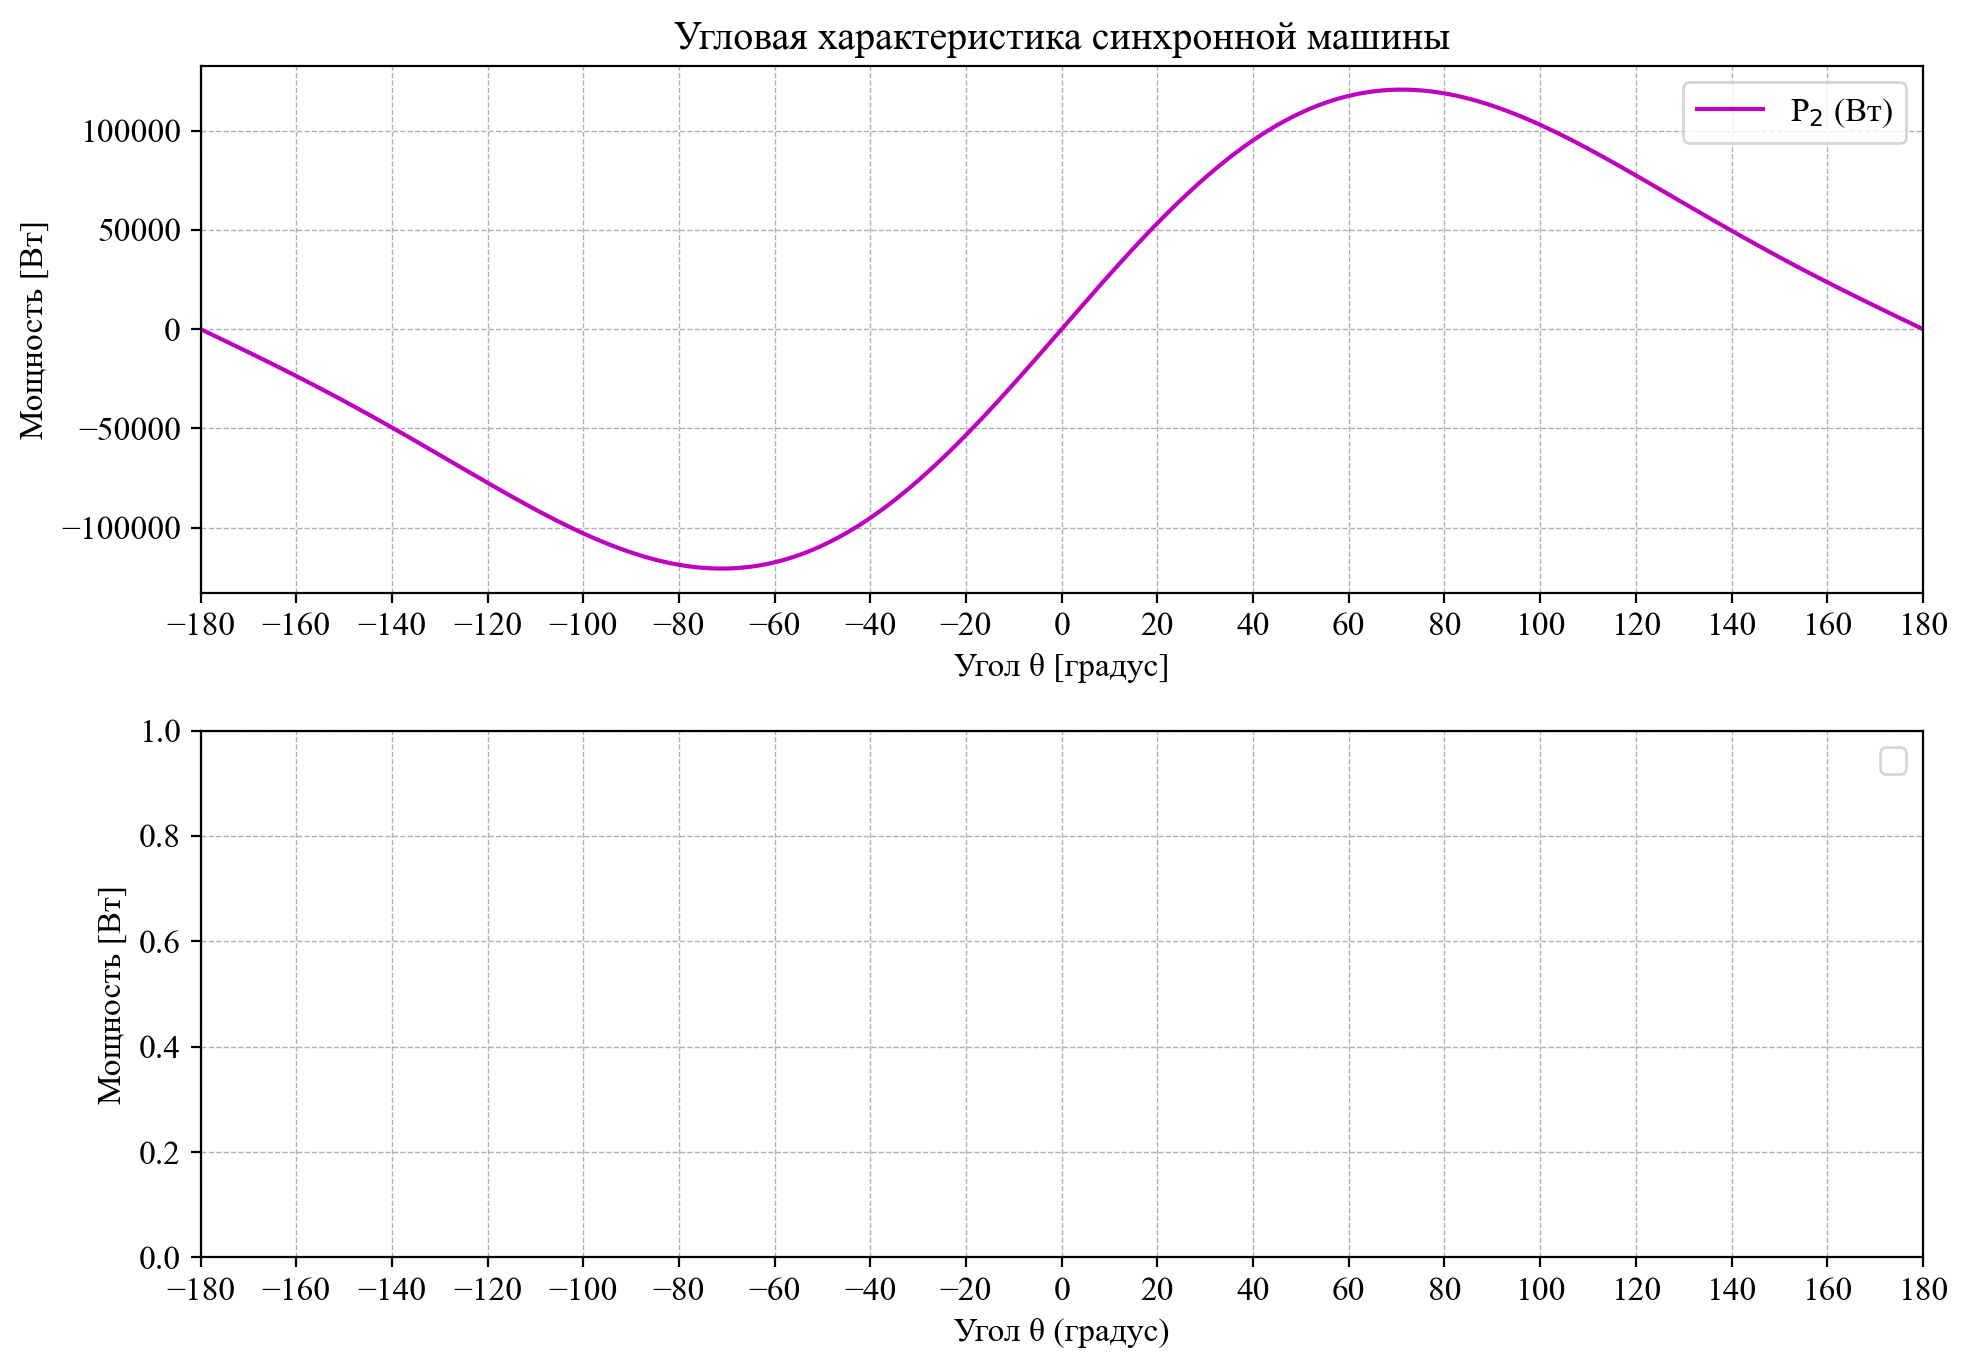

In [16]:
theta_values = np.linspace( - np.pi, np.pi, 500)


# P_2_values = ((SG.m_f*E_0yap*SG.U_f*np.sin(theta_values)) / X_dyap) + \
#     ((SG.m_f * SG.U_f**2) / 2) *((1/X_q) - (1/X_dyap))\
#           *np.sin(2*theta_values)

#ildus1
P_2_full1 = ((SG.m_f*E_0yap*(SG.U_f - U_r)*np.sin(theta_values)) / X_dyap) + \
    ((SG.m_f * (SG.U_f**2 - U_r**2)) / 2) *((1/X_q) - (1/X_dyap))\
          *np.sin(theta_values*2)



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), dpi=200)

ax1.set_title("Угловая характеристика синхронной машины")

ax1.plot(np.degrees(theta_values), P_2_full1, "m")
# ax1.plot(np.degrees(theta_values), P_2_values_aktiv, "b:", linewidth=2)
ax1.set_xlabel("Угол θ [градус]")
ax1.set_ylabel(r"Мощность [Вт]")
ax1.set_xlim(-np.degrees(np.pi), np.degrees(np.pi))
x_major_ticks = np.arange(-180, 181, 20)  # Основные деления по X (шаг 1)
ax1.set_xticks(x_major_ticks)
ax1.legend ((r"P$_{2}$ (Вт)", r"P$_{осн}$ (Вт)"))
ax1.grid(which='both', linestyle='--', linewidth=0.5)




# Второй график
# ax2.plot(np.degrees(theta_values), P_2_value_reaktiv)
ax2.set_xlim(-180, 180)
ax2.set_xlabel("Угол θ (градус)")
ax2.set_ylabel(r"Мощность [Вт]")
ax2.set_xticks(x_major_ticks)
ax2.legend ((r"P$_{доб}$ (Вт)", ))


# Сетка
ax2.grid(which='both', linestyle='--', linewidth=0.5)



# Настройка расстояния между графиками
plt.tight_layout()

# Показ графика
plt.show()



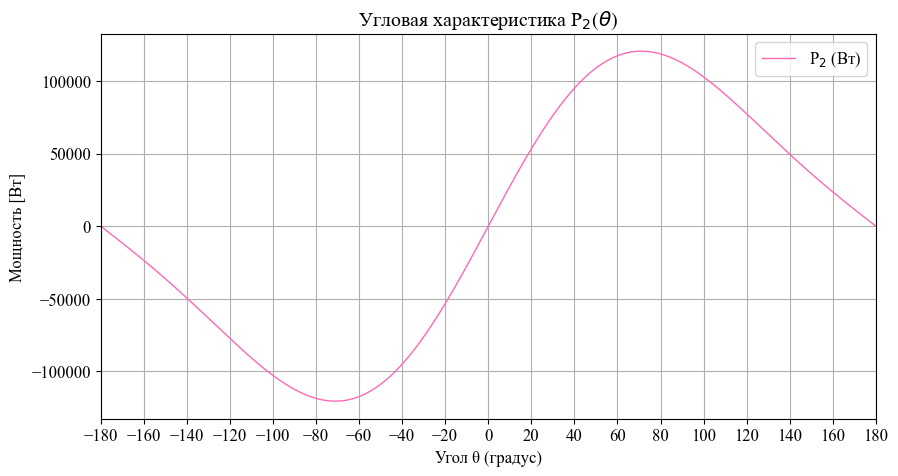

In [17]:
# Построение графика
plt.figure(figsize=(10, 5), dpi = 100)
plt.title(r"Угловая характеристика P$_{2}$($\theta$)")
plt.plot(np.degrees(theta_values), P_2_full1, "hotpink", linewidth=1)
# plt.plot(np.degrees(theta_values), P_2_values_aktiv, "b-.")
# plt.plot(np.degrees(theta_values), P_2_value_reaktiv)
plt.xlabel("Угол θ (градус)")
plt.ylabel(r"Мощность [Вт]")
plt.xlim(-np.degrees(np.pi), np.degrees(np.pi))
plt.legend ((r"P$_{2}$ (Вт)", r"P$_{осн}$ (Вт)", r"P$_{доб}$ (Вт)"))
x_major_ticks = np.arange(-180, 181, 20)  # Основные деления по X (шаг 1)
plt.xticks(x_major_ticks)


# plt.ylabel(r"P$_{2}$ (Вт)")
plt.xlim(-np.degrees(np.pi), np.degrees(np.pi))

plt.grid()
plt.show()


In [18]:
P_2_full1 = ((SG.m_f*E_0yap*(SG.U_f - U_r)*np.sin(20*u.deg)) / X_dyap) + \
    ((SG.m_f * (SG.U_f**2 - U_r**2)) / 2) *((1/X_q) - (1/X_dyap))\
          *np.sin(20*u.deg*2)
print(P_2_full1)



53327.1062053417 volt ** 2 / ohm


C:\Users\Bolyt\AppData\Local\Temp\ipykernel_21020\3843314001.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-." (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.degrees(theta), P_2_around_Ueta, "r-.", linewidth = 2, c ="r")


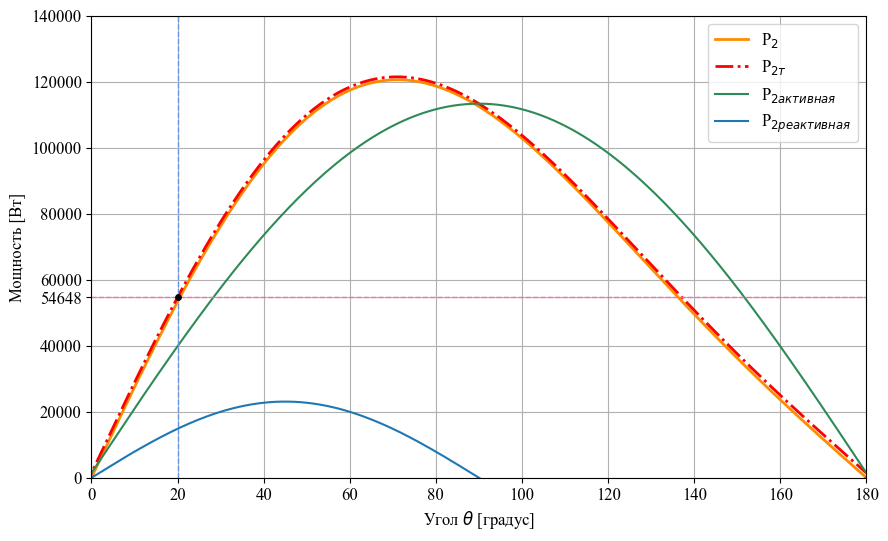

In [19]:
plt.figure(figsize=(10, 6), dpi = 100)
delta_fi_R = - delta_fi_R
theta = np.linspace( - np.pi, np.pi, 500)
#формулы для графика
P_2_around_Ueta = SG.m_f * SG.U_f * SG.etta *((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta)+ \
        ((E_0yap / X_dyap) + U_etta * np.sin(theta)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2_val =((SG.m_f * E_0yap * (SG.U_f - U_r)) * np.sin(theta)/ X_dyap)\
       + ((SG.m_f * (SG.U_f**2 - U_r**2)/2) * ((1/X_q)-(1/X_dyap))*np.sin(2 * theta))

P_2ak = SG.m_f * SG.U_f * SG.etta * (((E_0yap / X_dyap) + U_etta * np.sin(theta)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2reak = SG.m_f * SG.U_f * SG.etta * ((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta))

#для номинальных значений
theta1 = 20 * u.deg
P_2_around_Ueta1 = SG.m_f * SG.U_f * SG.etta *((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta1)+ \
        ((E_0yap / X_dyap) + U_etta * np.sin(theta1)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta1)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2_val1 =((SG.m_f * E_0yap * (SG.U_f - U_r)) * np.sin(theta1)/ X_dyap)\
       + ((SG.m_f * (SG.U_f**2 - U_r**2)/2) * ((1/X_q)-(1/X_dyap))*np.sin(2 * theta1))

P_2ak1 = SG.m_f * SG.U_f * SG.etta * (((E_0yap / X_dyap) + U_etta * np.sin(theta1)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta1)+\
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2reak1 = SG.m_f * SG.U_f * SG.etta * ((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta1))


# psi = np.linspace(+np.pi, -np.pi, 1000)
# P2_psi = SG.m_f * (E_0 * np.sin(psi)/ (X_L + -X_c)) * (E_0 * np.cos(psi) - U_r) * SG.etta
# plt.plot(np.degrees(psi), P2_psi)

plt.plot(np.degrees(theta), P_2_val, linewidth = 2, c = "darkorange")
plt.plot(np.degrees(theta), P_2_around_Ueta, "r-.", linewidth = 2, c ="r")
plt.plot(np.degrees(theta), P_2ak, c = "seagreen")
plt.plot(np.degrees(theta), P_2reak)
plt.xlim(-np.degrees(np.pi), np.degrees(np.pi))
theta = 20 *u.deg
plt.legend ((f"P$_2$",\
              r"P$_{2т}$",\
                       r"P$_{2 активная}$", r"P$_{2 реактивная}$"))
# r"P$_{\psi}$ (Вт)"
plt.grid()
# plt.tick_params(axis='both', labelsize=10)
x_major_ticks1 = np.arange(-180, 181, 20)  # Основные деления по X (шаг 1)
plt.xticks(x_major_ticks1)
y_major_ticks1 = np.arange(0, 160000, 160000/8)  # Основные деления по X (шаг 1)
plt.yticks(y_major_ticks1)

current_ticks = plt.gca().get_yticks()
new_ticks = np.append(current_ticks, P_2.magnitude)
plt.gca().set_yticks(new_ticks)
plt.xlim(0, 180)
plt.ylim(0)

plt.ylabel(r"Мощность [Вт]")
plt.xlabel(r"Угол ${\theta}$ [градус]")
plt.axhline(P_2,color = "hotpink", linestyle = "--", linewidth = 1)
plt.axvline(SG.tetta, color = "cornflowerblue", linestyle = "--", linewidth = 1)
# plt.axvline(I_f, color="red", linestyle="--", label="Ток фазы")
# plt.axhline(SG.U_f, color="blue", linestyle="--", label="Напряжение фазы")
plt.scatter(SG.tetta, P_2, color="black",  s=15, zorder=10)
plt.show()
 

In [20]:
theta = 20*u.deg
# проверка знаечния по формуле Илдуса
P_2_around_Ueta = SG.m_f * SG.U_f * SG.etta * ((U_etta/2)*np.cos(delta_fi_R) *((1/X_q)-(1/X_dyap))*np.sin(2*theta)+ \
        ((E_0yap / X_dyap) + U_etta * np.sin(theta)* np.sin(delta_fi_R)*((1/X_dyap)-(1/X_q)))*np.sin(theta) + \
          ((U_etta * np.sin(delta_fi_R))/X_q))

P_2_val =((SG.m_f * E_0yap * (SG.U_f - U_r)) * np.sin(theta)/ X_dyap)\
       + ((SG.m_f * (SG.U_f**2 - U_r**2)/2) * ((1/X_q)-(1/X_dyap))*np.sin(2 * theta))
print(P_2_around_Ueta)
print(P_2_val)

54647.999999999985 volt ** 2 / ohm
53327.1062053417 volt ** 2 / ohm


In [21]:
# I_f = I_f.to('A')
# X_q = X_q.to("ohm")
# X_dyap = -X_dyap.to("ohm")
print(X_dyap)


0.46446788994042654 ohm


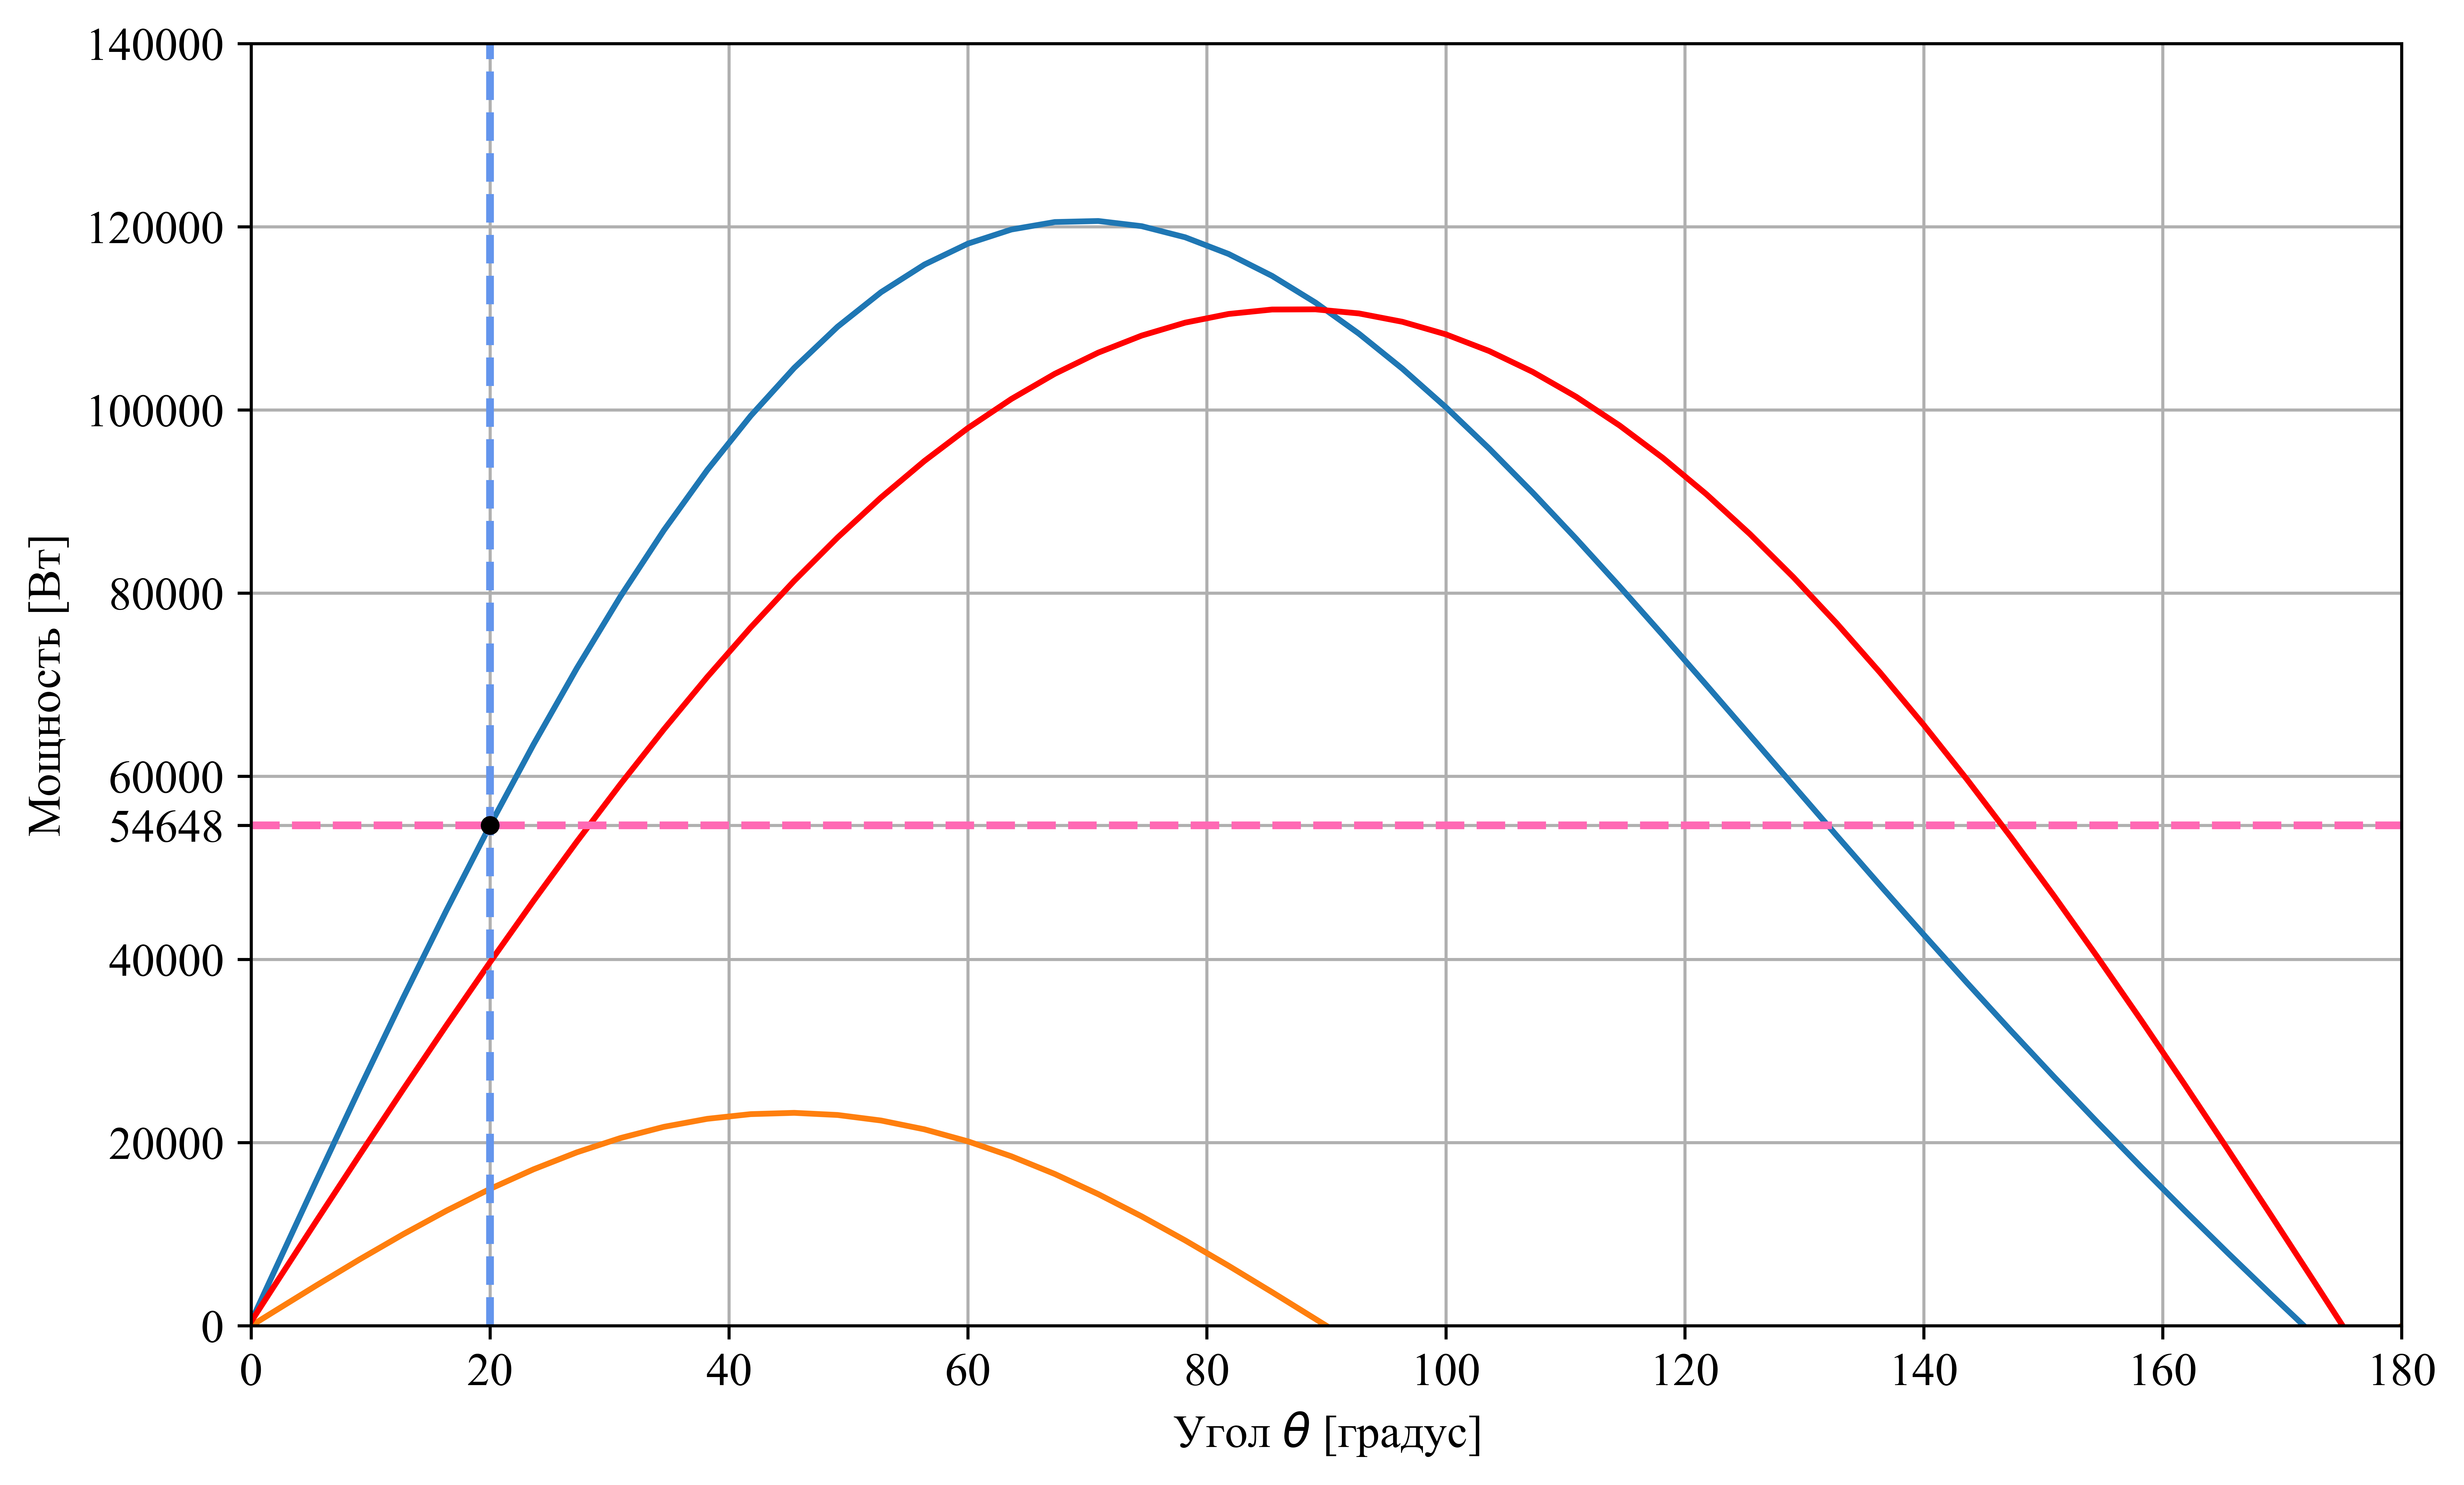

In [22]:
theta = np.linspace( - np.pi, np.pi, 100)
plt.figure(figsize=(10, 6), dpi = 1000)


# th = 20 * u.deg           мои графики и формулы
P_kamil2 = SG.m_f * ((-I_f * U_r) +(SG.U_f * U_r*np.cos(gammapi) * np.cos(theta) / X_q) + \
                (SG.U_f**2 / 2)*((1/X_q)-(1/X_dyap))*np.sin(2*theta) +\
                    np.sin(theta)*SG.U_f *((E_0yap/X_dyap)-(U_r * np.sin(gammapi)/ X_dyap)))
P_kamil2_re = SG.m_f *(SG.U_f**2 / 2)*((1/X_q)-(1/X_dyap))*np.sin(2*theta)

plt.ylabel(r"Мощность [Вт]")
plt.xlabel(r"Угол ${\theta}$ [градус]")
plt.plot(np.degrees(theta), P_kamil2)
plt.plot(np.degrees(theta), P_kamil2_re)
plt.plot(np.degrees(theta), P_kamil2-P_kamil2_re, c ="r")
plt.xlim(-np.degrees(np.pi), np.degrees(np.pi))
x_major_ticks1 = np.arange(-180, 181, 20)  # Основные деления по X (шаг 1)
plt.xticks(x_major_ticks1)
y_major_ticks1 = np.arange(0, 160000, 160000/8)  # Основные деления по X (шаг 1)
plt.yticks(y_major_ticks1)
current_ticks = plt.gca().get_yticks()
new_ticks = np.append(current_ticks, P_2.magnitude)
plt.gca().set_yticks(new_ticks)

plt.xlim(0, 180)
plt.ylim(0, )
plt.scatter(SG.tetta, P_2, color="black",  s=15, zorder=10)
plt.axhline(P_2,color = "hotpink", linestyle = "--", linewidth = 2)
plt.axvline(SG.tetta, color = "cornflowerblue", linestyle = "--", linewidth = 2)
plt.grid()


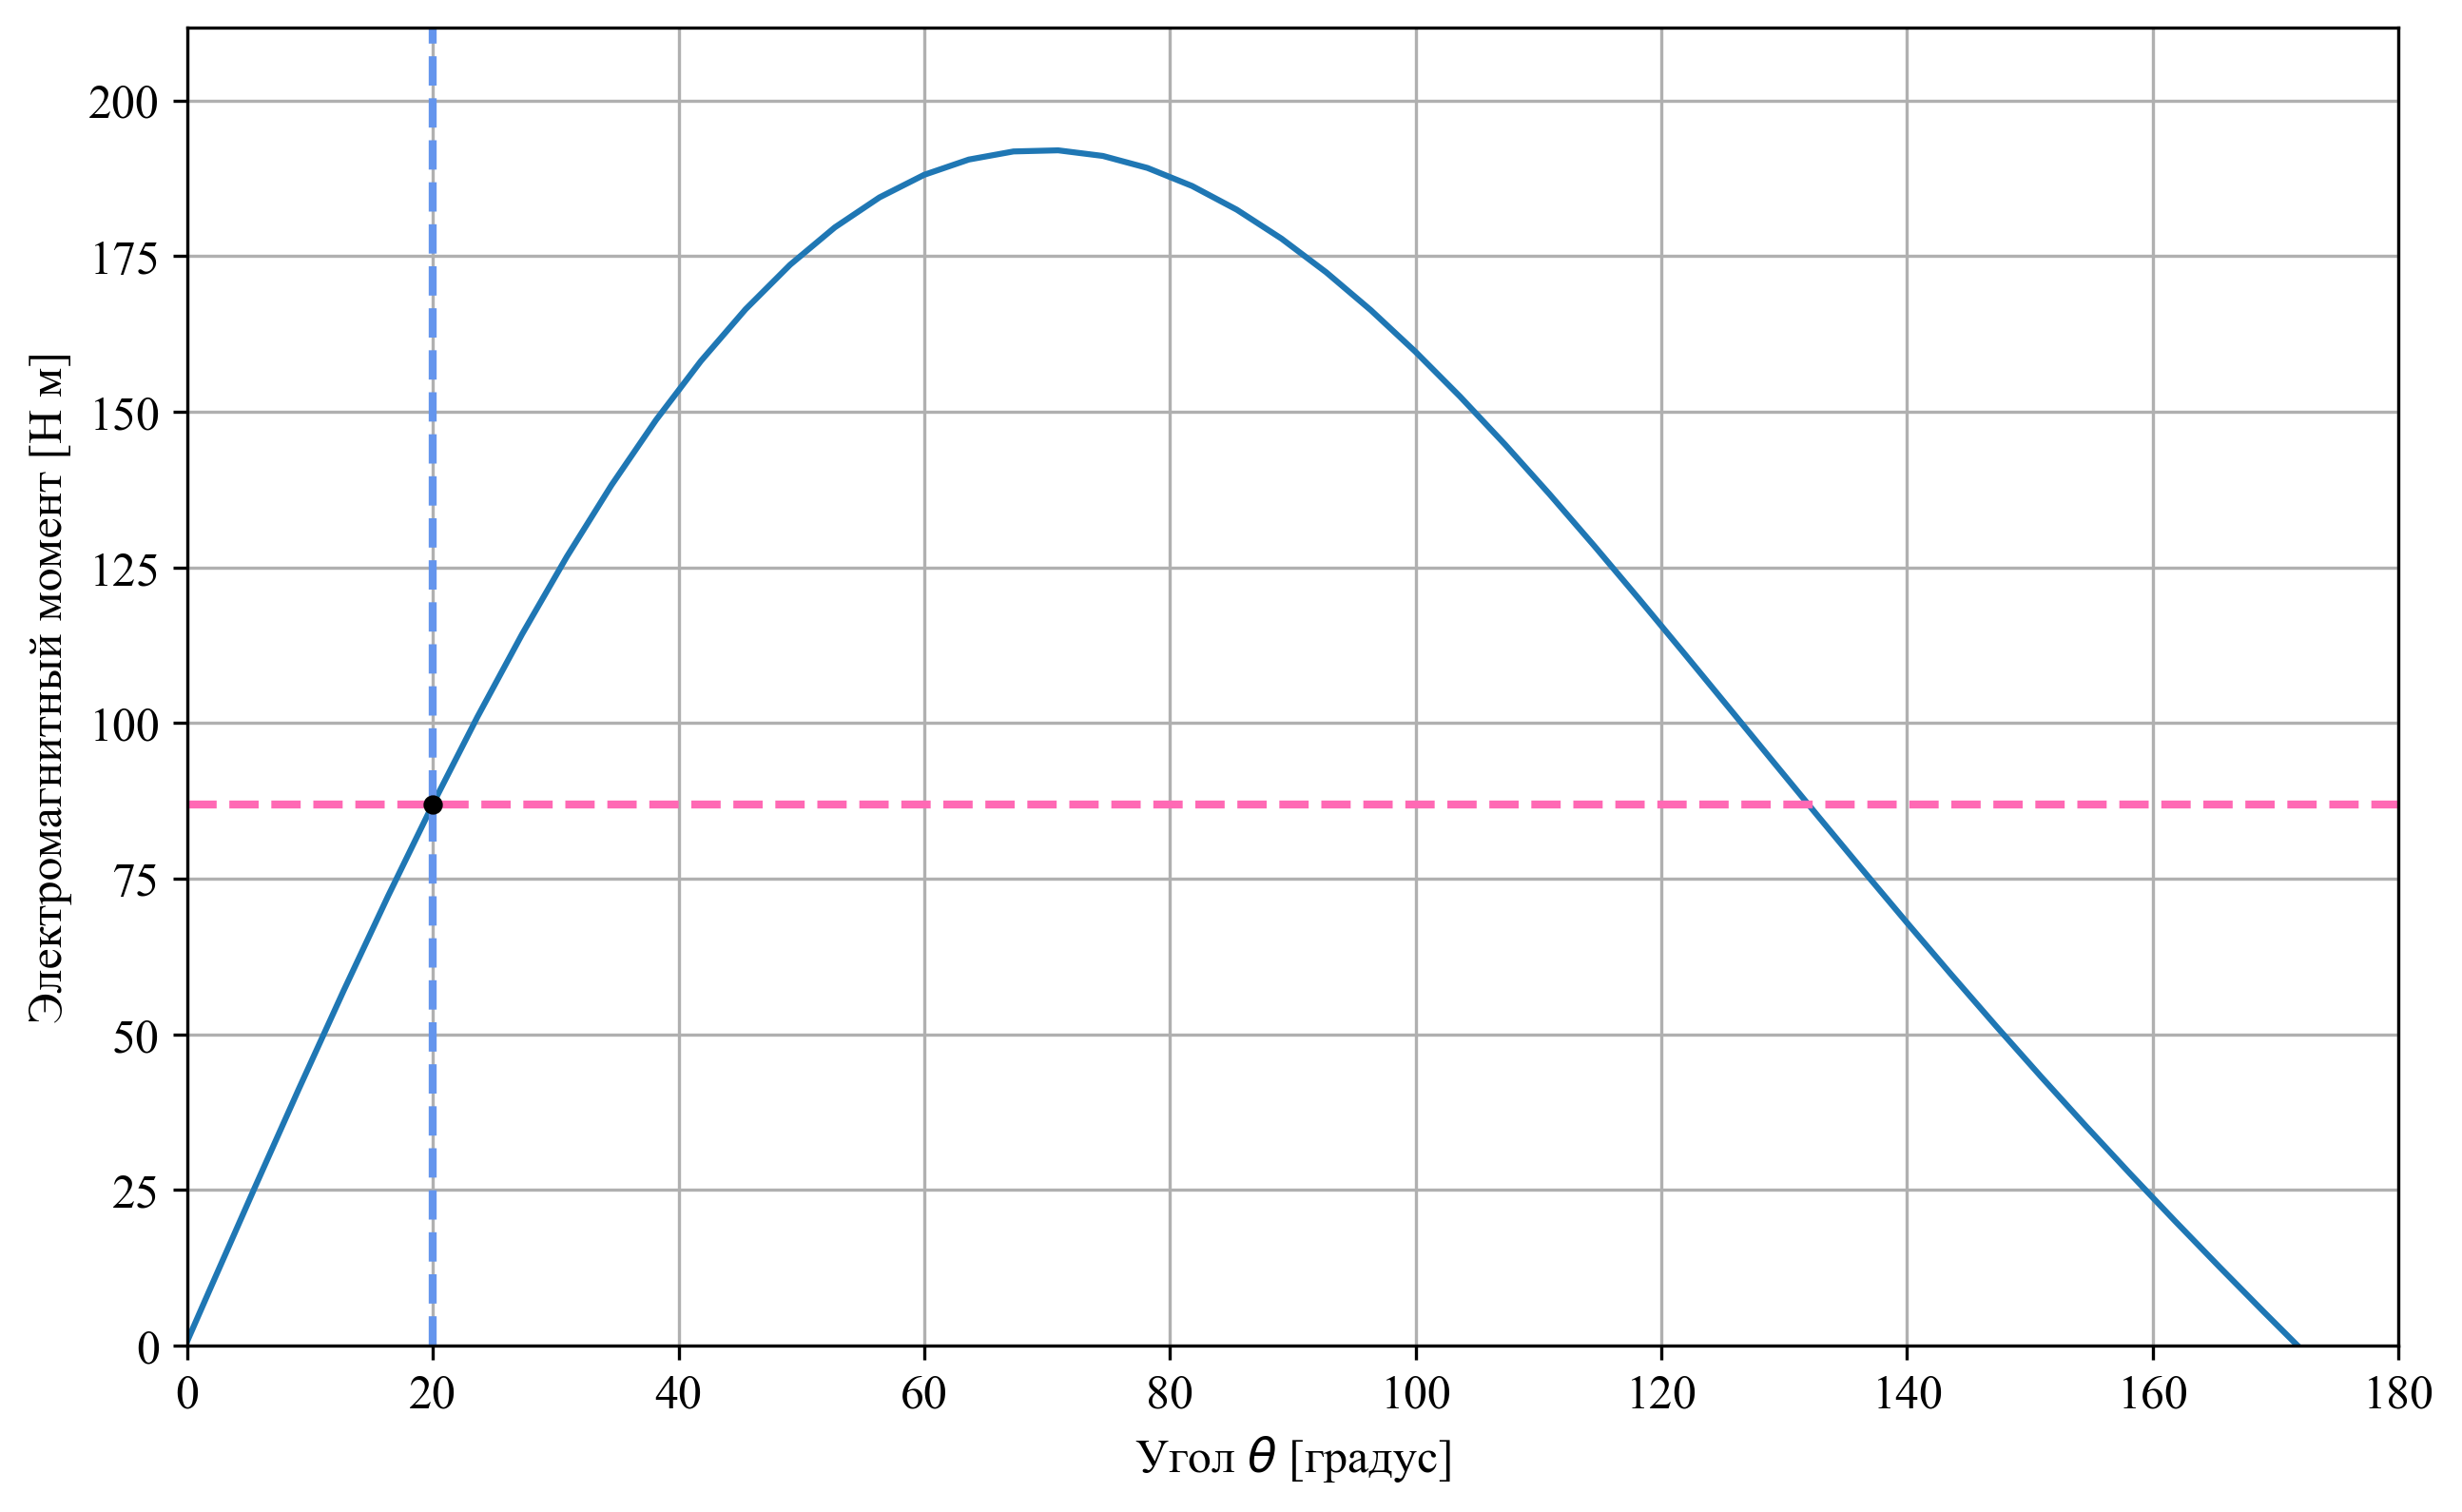

In [51]:
theta = np.linspace( - np.pi, np.pi, 100)
plt.figure(figsize=(10, 6), dpi = 300)


# th = 20 * u.deg           мои графики и формулы
M_kamil2 = (SG.m_f * ((-I_f * U_r) +(SG.U_f * U_r*np.cos(gammapi) * np.cos(theta) / X_q) + \
                (SG.U_f**2 / 2)*((1/X_q)-(1/X_dyap))*np.sin(2*theta) +\
                    np.sin(theta)*SG.U_f *((E_0yap/X_dyap)-(U_r * np.sin(gammapi)/ X_dyap))))/(2*np.pi*SG.n_speed)
M_kamil2 = M_kamil2.to("N*m")

P_kamil2_re = SG.m_f *(SG.U_f**2 / 2)*((1/X_q)-(1/X_dyap))*np.sin(2*theta)

plt.ylabel(r"Электромагнитный момент [Н м]")
plt.xlabel(r"Угол ${\theta}$ [градус]")
plt.plot(np.degrees(theta), M_kamil2)
plt.xlim(-np.degrees(np.pi), np.degrees(np.pi))
# x_major_ticks1 = np.arange(-180, 181, 20)  # Основные деления по X (шаг 1)
# plt.xticks(x_major_ticks1)
# y_major_ticks1 = np.arange(0, 220, 200/10)  # Основные деления по X (шаг 1)
# plt.yticks(y_major_ticks1)
# current_ticks = plt.gca().get_yticks()
# new_ticks = np.append(current_ticks, (P_2/(2 * np.pi *SG.n_speed)).magnitude)
# plt.gca().set_yticks(new_ticks)

plt.xlim(0, 180)
plt.ylim(0, )
plt.scatter(SG.tetta, (P_2/(2 * np.pi *SG.n_speed)).to("N*m"), color="black",  s=15, zorder=10)
plt.axhline((P_2/(2 * np.pi *SG.n_speed)).to("N*m"),color = "hotpink", linestyle = "--", linewidth = 2)
plt.axvline(SG.tetta, color = "cornflowerblue", linestyle = "--", linewidth = 2)
plt.grid()

In [53]:
theta = 20 * u.deg

M_kamil2 = (SG.m_f * ((-I_f * U_r) +(SG.U_f * U_r*np.cos(gammapi) * np.cos(theta) / X_q) + \
                (SG.U_f**2 / 2)*((1/X_q)-(1/X_dyap))*np.sin(2*theta) +\
                    np.sin(theta)*SG.U_f *((E_0yap/X_dyap)-(U_r * np.sin(gammapi)/ X_dyap))))/(2*np.pi*SG.n_speed)
M_kamil2 = M_kamil2.to("N*m")

M_kamil2

<Quantity(86.9749933, 'newton * meter')>

In [23]:
theta =  20 * u.deg
# Моя формула
P_kamil2 = SG.m_f * ((-I_f * U_r) +(SG.U_f * U_r*np.cos(gammapi) * np.cos(theta) / X_q) + \
                (SG.U_f**2 / 2)*((1/X_q)-(1/X_dyap))*np.sin(2*theta) +\
                    np.sin(theta)*SG.U_f *((E_0yap/X_dyap)-(U_r * np.sin(gammapi)/ X_dyap)))
print(P_kamil2)

theta =  -20 * u.deg
# Моя формула
P_kamil2 = SG.m_f * ((-I_f * U_r) +(SG.U_f * U_r*np.cos(gammapi) * np.cos(theta) / X_q) + \
                (SG.U_f**2 / 2)*((1/X_q)-(1/X_dyap))*np.sin(2*theta) +\
                    np.sin(theta)*SG.U_f *((E_0yap/X_dyap)-(U_r * np.sin(gammapi)/ X_dyap)))
print(P_kamil2)

theta =  20 * u.deg
# Формула Илдуса 1
P_2_val =((SG.m_f * E_0yap * (SG.U_f - U_r) / X_dyap) * np.sin(theta))\
       + ((SG.m_f * (SG.U_f**2 - U_r**2)/2) * ((1/X_q)-(1/X_dyap))*np.sin(2 * theta))
print(P_2_val)

dobavka = SG.m_f * ((-I_f * U_r) +(SG.U_f * U_r*np.cos(gammapi) * np.cos(theta) / X_q))
print(dobavka)


54648.0 ampere * volt
-54367.72559464132 ampere * volt
53327.10620534169 volt ** 2 / ohm
140.1372026793465 ampere * volt


In [24]:
print(X_c)

0.3096452599602843 volt ** 2 / volt_ampere


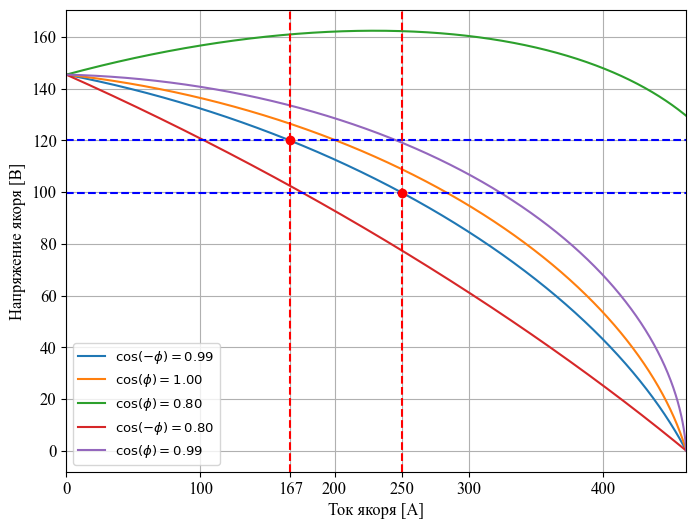

In [25]:
plt.figure(figsize=(8, 6), dpi = 100)

# Внешняя характеристика
I_ks = E_0 / np.sqrt(R_a**2 + X_d**2)
I = np.linspace(0, I_ks, 1000)
X_c = -X_c
phi = [fi, 0 * u.deg, 36.87 * u.deg, -36.87 * u.deg, -fi]
for Phi_for in phi:
    U_ya = np.sqrt(E_0**2 + R_a * X_c * I**2 * np.sin(2 * Phi_for) \
                - (X_c * I * np.cos(Phi_for))**2 \
                      - (R_a * I * np.sin(Phi_for))**2) - X_c * I * np.sin(Phi_for) - R_a*I*np.cos(Phi_for)
    if Phi_for >= 0:
        plt.plot(I, U_ya, label=f"$\\cos(\\phi) = {np.cos(Phi_for.to('rad').magnitude):.2f}$")
    elif Phi_for < 0:
        plt.plot(I, U_ya, label=f"$\\cos(-\\phi) = {np.cos(Phi_for.to('rad').magnitude):.2f}$")


plt.xlabel("Ток якоря [A]")
plt.ylabel(r"Напряжение якоря [В]")

plt.grid()

current_ticks = plt.gca().get_xticks()
new_ticks = np.append(current_ticks, round(I_f.magnitude))
new_ticks = np.append(new_ticks, round(I_f.magnitude * 1.5))
plt.gca().set_xticks(new_ticks)
plt.xlim(0, I_ks)

plt.scatter(I_f, SG.U_f, color="red", zorder = 10)
plt.scatter(I_f*1.5,99.82621928964 , color="red", zorder = 10)
plt.axvline(I_f, color="red", linestyle="--")
plt.axhline(SG.U_f, color="blue", linestyle="--")

plt.axvline(I_f*1.5, color="red", linestyle="--")
plt.axhline(99.82621928964, color="blue", linestyle="--")

plt.legend(fontsize=9.5)
plt.show()


In [26]:
I=I_f*1.5
Phi_for = fi
U_ya = np.sqrt(E_0**2 + R_a * X_c * I**2 * np.sin(2 * Phi_for) \
                - (X_c * I * np.cos(Phi_for))**2 \
                      - (R_a * I * np.sin(Phi_for))**2) - X_c * I * np.sin(Phi_for) - R_a*I*np.cos(Phi_for)
U_ya

<Quantity(99.8262193, 'volt')>

Text(0.5, 0, 'Угол ${\\psi}$ [градус]')

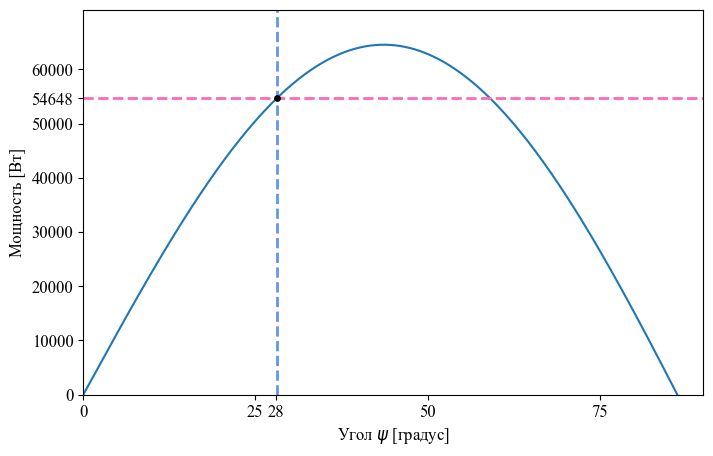

In [27]:
plt.figure(figsize=(8, 5), dpi = 100)
# зависимость полезной мощности от угла ПСИ
psi = np.linspace(- np.pi/2, np.pi/2, 1000)
X_c = -X_c
P2_psi = SG.m_f * (E_0 * np.sin(psi)/ (X_L + X_c)) * (E_0 * np.cos(psi) - U_r) * SG.etta
plt.plot(np.degrees(psi), P2_psi)
current_ticks = plt.gca().get_xticks()
new_ticks = np.append(current_ticks, round(np.degrees(-ksi.magnitude)))
plt.gca().set_xticks(new_ticks)

y_major_ticks1 = np.arange(0, 70000, 70000/7)  # Основные деления по X (шаг 1)
plt.yticks(y_major_ticks1)
current_ticks = plt.gca().get_yticks()
new_ticks = np.append(current_ticks, P_2.magnitude)
plt.gca().set_yticks(new_ticks)

plt.xlim(0, np.degrees(np.pi/2))
plt.ylim(0)

plt.scatter(np.degrees(-ksi), P_2, color="black",  s=15, zorder=10)
plt.axhline(P_2,color = "hotpink", linestyle = "--", linewidth = 2)
plt.axvline(np.degrees(-ksi), color = "cornflowerblue", linestyle = "--", linewidth = 2)

plt.ylabel(r"Мощность [Вт]")
plt.xlabel(r"Угол ${\psi}$ [градус]")

In [28]:
psi = -fi + 20 * u.deg
P2_psi = SG.m_f * (E_0 * np.sin(psi.to('rad'))/ (X_L + X_c)) * (E_0 * np.cos(psi.to('rad')) - U_r) * SG.etta
P2_psi

<Quantity(54648.0, 'volt_ampere')>

Text(0.5, 0, 'Ток [А]')

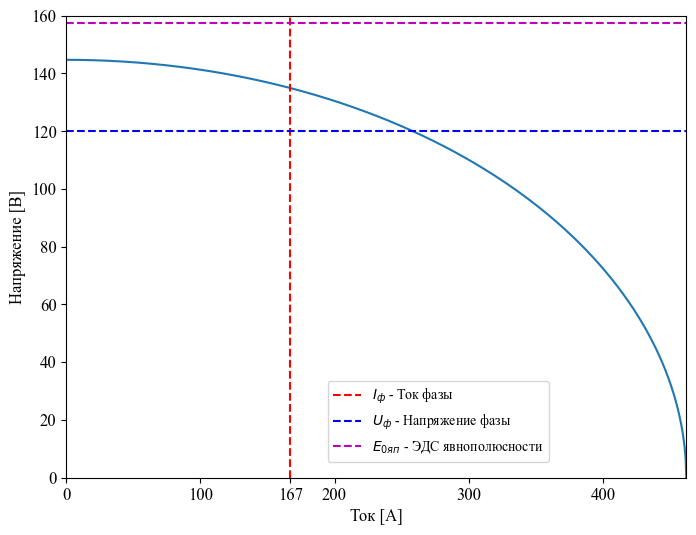

In [29]:
plt.figure(figsize=(8, 6), dpi = 100)
I = np.linspace(0, I_ks, 1000)
#Харктеристика КЗ
U_n = np.sqrt((1 - (I/I_ks)**2)*E_0**2 * np.cos(fi))
plt.plot(I, U_n)
current_ticks = plt.gca().get_xticks()
new_ticks = np.append(current_ticks, round(I_f.magnitude))
# new_ticks = np.append(new_ticks, round(I_f.magnitude * 1.5))
plt.gca().set_xticks(new_ticks)
plt.xlim(0, I_ks)
plt.ylim(0, 160*u.V)
plt.axvline(I_f, color="red", linestyle="--", label = r"$I_{ф}$ - Ток фазы")
plt.axhline(SG.U_f, color="blue", linestyle="--", label = r"$U_{ф}$ - Напряжение фазы")
plt.axhline(E_0yap,color="m", linestyle="--",label = r"$E_{0яп}$ - ЭДС явнополюсности")
plt.legend(loc='lower center', bbox_to_anchor=(0.6, 0.02), fontsize=10)
plt.ylabel(r"Напряжение [В]")
plt.xlabel(r"Ток [А]")
